In [1]:
# #importing resources
import pandas as pd
import numpy as np
from sympy import S, symbols, printing
from matplotlib import pyplot as plt
import datetime
import seaborn as sns

In [2]:
# specifying file location
file = '//north.cfs.uoguelph.ca/soe-other-home$/dhimanj/Desktop/pcp_newswat.txt'

In [3]:
# reading the file
pcp = pd.read_csv(file, sep =" ")

In [4]:
# checking if adata is read
pcp.head()

,20010101
0,1.8
1,0.3
2,7.2
3,9.8
4,3.9


In [5]:
# adding a date column
pcp['date'] = pd.date_range(start='1/1/2001', periods=len(pcp), freq='D')

In [6]:
# checking again
pcp.head()

,20010101,date
0,1.8,2001-01-01
1,0.3,2001-01-02
2,7.2,2001-01-03
3,9.8,2001-01-04
4,3.9,2001-01-05


In [7]:
# checking size
pcp.shape

(6117, 2)

In [10]:
# renaming column
pcp.rename(columns={'20010101':'precip'}, inplace=True)

In [11]:
# checking again
pcp.head()

,precip,date
0,1.8,2001-01-01
1,0.3,2001-01-02
2,7.2,2001-01-03
3,9.8,2001-01-04
4,3.9,2001-01-05


In [12]:
# deleting all rows with -99 values
pcp = pcp[pcp.precip != -99]

In [13]:
# checking once more
pcp.head()

,precip,date
0,1.8,2001-01-01
1,0.3,2001-01-02
2,7.2,2001-01-03
3,9.8,2001-01-04
4,3.9,2001-01-05


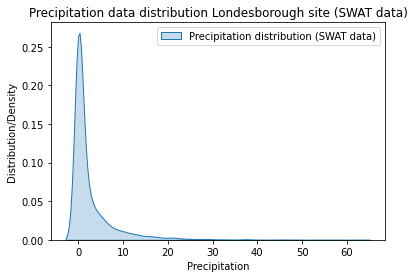

In [14]:
# distribution graph of pcp data
sns.kdeplot(pcp.precip, shade=True, label='Precipitation distribution (SWAT data)')
plt.title('Precipitation data distribution Londesborough site (SWAT data)')
plt.xlabel('Precipitation')
plt.ylabel('Distribution/Density')
plt.legend()

Text(0.5, 1.0, 'Precipitation data distribution Londesborough site (SWAT data)')

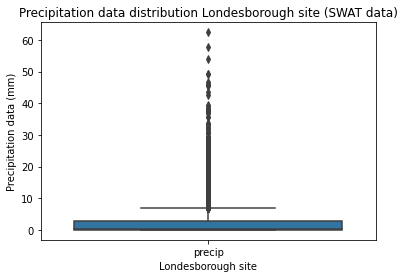

In [15]:
# plotting boxplot
plt.figure()
sns.boxplot(data=pcp)
plt.xlabel('Londesborough site')
plt.ylabel('Precipitation data (mm)')
plt.title('Precipitation data distribution Londesborough site (SWAT data)')

In [16]:
### finding daily averages

### setting date as index in the data set
pcp.set_index('date')

### resampling data so that we have yearly values
pcp_yearly = pcp.resample('Y', on='date').sum()

In [17]:
#checking pcp_yearly dataset
pcp_yearly.head(20)

,precip
date,
2001-12-31,957.500
2002-12-31,749.400
2003-12-31,971.300
2004-12-31,932.400
2005-12-31,823.200
2006-12-31,1073.300
2007-12-31,722.900
2008-12-31,1108.500
2009-12-31,876.700


Text(0.5, 1.0, 'Annual precipitation data distribution Londesborough site (SWAT data)')

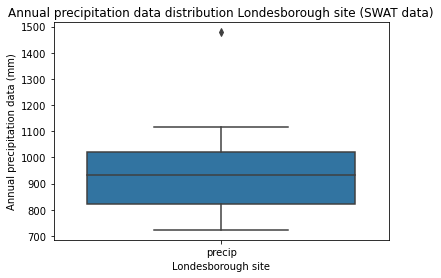

In [18]:
# plotting boxplot
plt.figure()
sns.boxplot(data=pcp_yearly)
plt.xlabel('Londesborough site')
plt.ylabel('Annual precipitation data (mm)')
plt.title('Annual precipitation data distribution Londesborough site (SWAT data)')

Text(0.5, 1.0, 'Annual precipitation data for Londesborough site (SWAT data)')

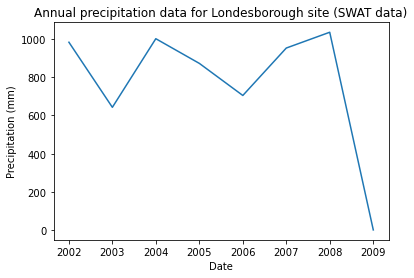

In [43]:
# plotting lineplot
plt.figure()
sns.lineplot(data=pcp_yearly, x='date', y='precip')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Annual precipitation data for Londesborough site (SWAT data)')